In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

Modyfying fits inputs for pipeline to see effect on correlation function.
- flip signs of ellipticities $\varepsilon_1+i\varepsilon_2$ $\rightarrow$ $\varepsilon_1-i\varepsilon_2$
- randomly spin orientations $\varepsilon$ $\rightarrow$ $e^{i\phi}\varepsilon$ where $\phi$ is randomly sampled  $\in\,[0,2\pi]$
- xyz $\rightarrow$ RA DEC. to use RADEC in pipeline inputs
- setting magnitudes of ellipticities to a constant

bottom code makes inputs for ellipticity normalised catalogue


# Flip

In [17]:
for i in range(1000):
    fits_file_path = f'LH_ellipticities/CAMELS_data_LH{i}.fits'

    with fits.open(fits_file_path) as hdul:
        data = hdul[1].data

    # Now you can use the same variable names
    x = data['x']
    y = data['y']
    z = data['z']
    ia_1 = data['ia_1']
    ia_2 = data['ia_2']


    ia_1 = -ia_1

    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        #fits.Column(name='jackknife_ID', format='D', array=jack),
        fits.Column(name='x', format='D', array=x),
        fits.Column(name='y', format='D', array=y),
        fits.Column(name='z', format='D', array=z),
        fits.Column(name='ia_1', format='D', array=ia_1),
        fits.Column(name='ia_2', format='D', array=ia_2),
    #     fits.Column(name='chi', format='D', array=chi)
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_flipped/CAMELS_data_LH{i}_flipped.fits', overwrite=True)
    
    ###########################
    length=len(x)
    x_rand = np.random.uniform(min(x), max(x), length)
    y_rand = np.random.uniform(min(y), max(y), length)
    z_rand = np.random.uniform(min(z), max(z), length)
    # z_true_rand = np.random.uniform(min(z_true), max(z_true), length)
    #z_true_rand2 = np.random.uniform(min(z_true), max(z_true), length)
    ia_1_rand = np.random.normal(loc=0, scale=np.std(ia_1), size=length)
    ia_2_rand = np.random.normal(loc=0, scale=np.std(ia_2), size=length)

    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        #fits.Column(name='jackknife_ID', format='D', array=jack),
        fits.Column(name='x', format='D', array=x_rand),
        fits.Column(name='y', format='D', array=y_rand),
        fits.Column(name='z', format='D', array=z_rand),#0.1001*np.ones(len(pos_g[:,0]))),
        fits.Column(name='ia_1', format='D', array=ia_1_rand),
        fits.Column(name='ia_2', format='D', array=ia_2_rand),
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_flipped/CAMELS_rand_LH{i}_flipped.fits', overwrite=True)

# or Spin

In [28]:
for i in range(1000):
    fits_file_path = f'LH_ellipticities/CAMELS_data_LH{i}.fits'

    with fits.open(fits_file_path) as hdul:
        data = hdul[1].data

    # Now you can use the same variable names
    x = data['x']
    y = data['y']
    z = data['z']
    ia_1 = data['ia_1']
    ia_2 = data['ia_2']
    
    ######

    rangles = np.random.uniform(low=0,high=2*np.pi,size=len(ia_1))

    ell = ia_1 + 1j * ia_2

    ell_spun = np.absolute(ell) * np.exp(1j * rangles)
    # plt.hist(ell_spun.real)
    ia_1 = ell_spun.real
    ia_2 = ell_spun.imag
    
    ######
    
    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        #fits.Column(name='jackknife_ID', format='D', array=jack),
        fits.Column(name='x', format='D', array=x),
        fits.Column(name='y', format='D', array=y),
        fits.Column(name='z', format='D', array=z),
        fits.Column(name='ia_1', format='D', array=ia_1),
        fits.Column(name='ia_2', format='D', array=ia_2),
    #     fits.Column(name='chi', format='D', array=chi)
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_spun/CAMELS_data_LH{i}_spun.fits', overwrite=True)
    
    ###########################
    length=len(x)
    x_rand = np.random.uniform(min(x), max(x), length)
    y_rand = np.random.uniform(min(y), max(y), length)
    z_rand = np.random.uniform(min(z), max(z), length)
    # z_true_rand = np.random.uniform(min(z_true), max(z_true), length)
    #z_true_rand2 = np.random.uniform(min(z_true), max(z_true), length)
    ia_1_rand = np.random.normal(loc=0, scale=np.std(ia_1), size=length)
    ia_2_rand = np.random.normal(loc=0, scale=np.std(ia_2), size=length)

    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        #fits.Column(name='jackknife_ID', format='D', array=jack),
        fits.Column(name='x', format='D', array=x_rand),
        fits.Column(name='y', format='D', array=y_rand),
        fits.Column(name='z', format='D', array=z_rand),#0.1001*np.ones(len(pos_g[:,0]))),
        fits.Column(name='ia_1', format='D', array=ia_1_rand),
        fits.Column(name='ia_2', format='D', array=ia_2_rand),
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_spun/CAMELS_rand_LH{i}_spun.fits', overwrite=True)

# Change xyz -> RA DEC

In [29]:
import numpy as np

# Function to convert Cartesian coordinates to spherical coordinates
def cart_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    # make it so z is parallel to line of sight of observer
    theta = np.arccos(x / r)
    phi = np.arctan2(y, z)
    return r, theta, phi

# Function to convert spherical coordinates to RA and DEC in degrees
def spherical_to_ra_dec(theta, phi):
    ra = np.degrees(phi)
    dec = 90 - np.degrees(theta)
    return ra, dec

# Function to calculate the comoving distance from observer
# def comoving_distance(r):
#     # Assuming a cosmological model, you can use a formula or lookup table
#     # Here's a simple linear approximation for demonstration purposes
#     return r - 500  # Subtracting 500 Mpc

size_=100000# Given Cartesian coordinates
x_ = np.random.uniform(0, 25, size=size_)
y_ = np.random.uniform(0, 25, size=size_)
z_ = np.random.uniform(0, 25, size=size_)


In [9]:
# # Adding 500 Mpc to z-coordinate
z__ = z_ + 10000

# Convert Cartesian coordinates to spherical coordinates
r, theta, phi = cart_to_spherical(y, z, 10000+x)

# Convert spherical coordinates to RA and DEC
ra, dec = spherical_to_ra_dec(theta, phi)

# Calculate comoving distance
r_co = comoving_distance(r)

# Print results
# print("RA:", ra)
# print("DEC:", dec)
# print("Comoving Distance:", r_co)

0.005714395033408404 24.99941321383985


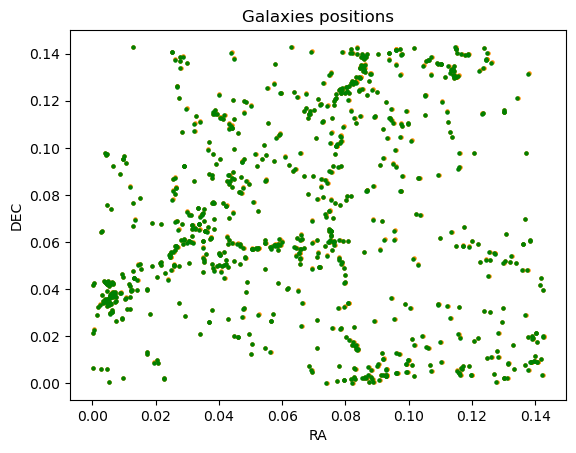

In [10]:
## SCALE IMPORTANT !!
scale = max(dec)/max(x_)
_ = plt.scatter(ra,dec,c='darkorange',s=5)
_ = plt.scatter(scale*(z),scale*y,c='green',s=5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Galaxies positions')
print(scale, max(x_))

138


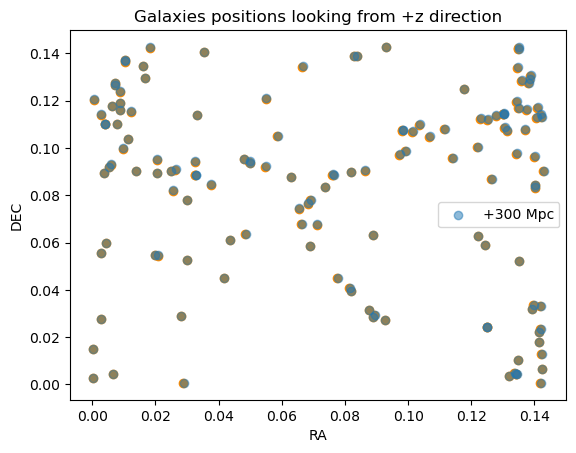

In [70]:
for i in range(17,18):
    fits_file_path = f'LH_ellipticities/CAMELS_data_LH{i}.fits'

    with fits.open(fits_file_path) as hdul:
        data = hdul[1].data

    # Now you can use the same variable names
    x = data['x']
    y = data['y']
    z = data['z']
    ia_1 = data['ia_1']
    ia_2 = data['ia_2']
#     print(i)

r, theta, phi = cart_to_spherical(x, y, z+10000)
ra, dec = spherical_to_ra_dec(theta, phi)
max_ra = np.max(ra)
_ = plt.scatter(0.00571439*y,0.00571439*x,c='darkorange')
_ = plt.scatter(ra,dec,alpha=0.5,label='+300 Mpc')
# r, theta, phi = cart_to_spherical(x, y, z+2000)
# ra, dec = spherical_to_ra_dec(theta, phi)
# _ = plt.scatter(ra*(max_ra/np.max(ra)),dec*(max_ra/np.max(ra)),alpha=0.5,label=f'+2000 Mpc scaled by {max_ra/np.max(ra):.2f}')
# r, theta, phi = cart_to_spherical(x, y, z+300)
# ra, dec = spherical_to_ra_dec(theta, phi)
# _ = plt.scatter(ra*(max_ra/np.max(ra)),dec*(max_ra/np.max(ra)),alpha=0.5)

plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Galaxies positions looking from +z direction')
plt.legend()
print(len(x))

In [5]:
ias_1 = np.array([])
ias_2 = np.array([])

In [31]:
for i in range(1000):
    fits_file_path = f'LH_ellipticities/CAMELS_data_LH{i}.fits'

    with fits.open(fits_file_path) as hdul:
        data = hdul[1].data

    # Now you can use the same variable names
    x = data['x']
    y = data['y']
    z = data['z']
    ia_1 = data['ia_1']
    ia_2 = data['ia_2']

     
    z+= 10000
    # Convert Cartesian coordinates to spherical coordinates
    r, theta, phi = cart_to_spherical(x, y, z)

    # Convert spherical coordinates to RA and DEC
    ra, dec = spherical_to_ra_dec(theta, phi)

    # Calculate comoving distance
#     r_co = comoving_distance(r)

    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        #fits.Column(name='jackknife_ID', format='D', array=jack),
        fits.Column(name='RA', format='D', array=ra),
        fits.Column(name='DEC', format='D', array=dec),
        fits.Column(name='r_col', format='D', array=r),
        fits.Column(name='ia_1', format='D', array=ia_1),
        fits.Column(name='ia_2', format='D', array=ia_2),
    #     fits.Column(name='chi', format='D', array=chi)
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_RADEC/CAMELS_proj_data_LHz{i}.fits', overwrite=True)
    
    ###########################
    length=len(x)
#     x_ = np.random.uniform(0, 25, size=length)
#     y_ = np.random.uniform(0, 25, size=length)
#     z_ = np.random.uniform(0, 25, size=length)
#     z_+= 10000
#     r_rand, theta, phi = cart_to_spherical(x_, y_, z_)
#     ra_rand, dec_rand = spherical_to_ra_dec(theta, phi)
    ra_rand = np.random.uniform(min(ra), max(ra), length)
    dec_rand = np.random.uniform(min(dec), max(dec), length)
    r_rand = np.random.uniform(min(r), max(r), length)
    # z_true_rand = np.random.uniform(min(z_true), max(z_true), length)
    #z_true_rand2 = np.random.uniform(min(z_true), max(z_true), length)
    ias_1 = np.append(ias_1,ia_1); ias_2 = np.append(ias_2,ia_2)
    ia_1_rand = np.random.normal(loc=0.00010791977297379453, scale=0.14812554318943333, size=length)
    ia_2_rand = np.random.normal(loc=3.277059434446139e-05, scale=0.1469793256996833, size=length)

    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        #fits.Column(name='jackknife_ID', format='D', array=jack),
        fits.Column(name='RA', format='D', array=ra_rand),
        fits.Column(name='DEC', format='D', array=dec_rand),
        fits.Column(name='r_col', format='D', array=r_rand)#0.1001*np.ones(len(pos_g[:,0]))),
#         fits.Column(name='ia_1', format='D', array=ia_1_rand),
#         fits.Column(name='ia_2', format='D', array=ia_2_rand),
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_RADEC/CAMELS_proj_rand_LHz{i}.fits', overwrite=True)

In [10]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

0.2032270318109836 0.2015384943195595 (823787,) (823787,)


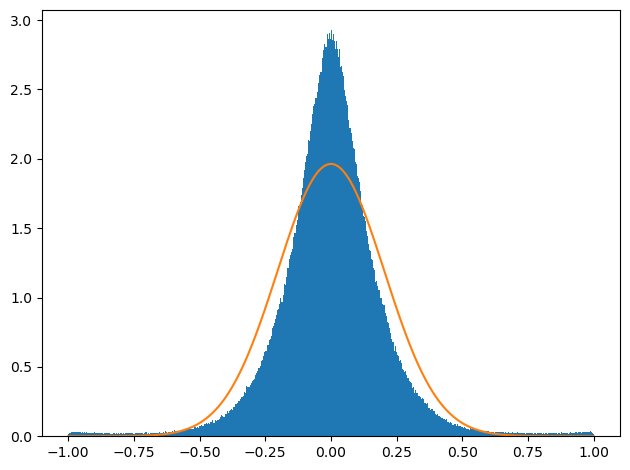

In [11]:
plt.hist(ias_1,bins=510,density=True)
sd_1 = np.std(ias_1); sd_2 = np.std(ias_2)
print(sd_1, sd_2, ias_1.shape, ias_2.shape)
plt.plot(np.linspace(-1,1,200), gaussian(np.linspace(-1,1,200), 0 ,sd_1))
plt.tight_layout()

0.00010791977297379453 3.277059434446139e-05 0.14812554318943333 0.1469793256996833


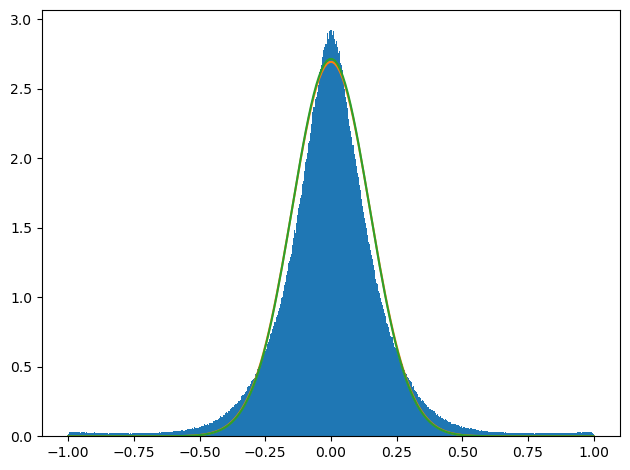

In [66]:
from scipy.stats import norm
from scipy.optimize import curve_fit
# Step 1: Create the histogram
counts, bin_edges = np.histogram(ias_1, bins=512, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Midpoints of bins
counts2, bin_edges2 = np.histogram(ias_2, bins=512, density=True)
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2  # Midpoints of bins
# Initial guesses for mean and standard deviation
mu_init = np.mean(ias_1)
sigma_init = np.std(ias_1)

# Step 3: Fit the Gaussian to the histogram data
params, _ = curve_fit(gaussian, bin_centers, counts, p0=[mu_init, sigma_init])
params2, _ = curve_fit(gaussian, bin_centers2, counts2, p0=[mu_init, sigma_init])

# Extract the fitted mean and standard deviation
mu_fit, sigma_fit = params
mu_fit2, sigma_fit2 = params2

plt.hist(ias_1,bins=512,density=True)
plt.plot(np.linspace(-1,1,200), gaussian(np.linspace(-1,1,200), mu_fit ,sigma_fit))
plt.plot(np.linspace(-1,1,200), gaussian(np.linspace(-1,1,200), mu_fit2 ,sigma_fit2))
plt.tight_layout()
print(mu_fit, mu_fit2, sigma_fit, sigma_fit2)

In [62]:
print(mu_fit, mu_fit2)

0.00010792632989032592 3.27033571035975e-05


0.22161486140744618


Text(0.5, 0, '$|\\varepsilon|$')

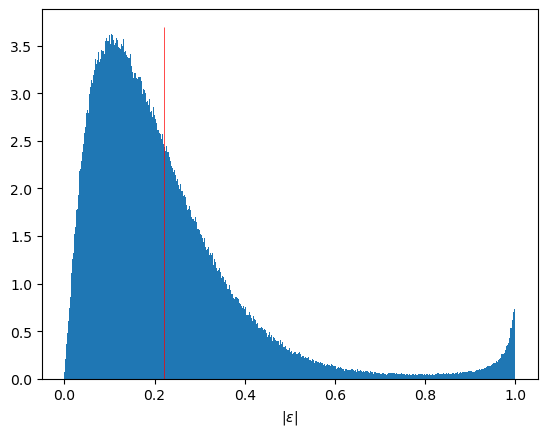

In [20]:
mean_e = np.mean(np.sqrt(ias_1**2+ias_2**2))
print(mean_e)
plt.hist(np.sqrt(ias_1**2+ias_2**2),bins=510,density=True)
plt.vlines(mean_e,ymin=0, ymax=3.7,lw=0.5, color='r')
plt.xlabel(r'$|\varepsilon|$')

### RADEC Magnatudes set to 1

In [5]:
np.mean(mags)

0.22450967254985182

In [32]:

axis = 'y'
for i in range(0,1000):
    fits_file_path = f'LH_ellipticities_RADEC/CAMELS_proj_data_LH{axis}{i}.fits'

    with fits.open(fits_file_path) as hdul:
        data = hdul[1].data

    # Now you can use the same variable names
    ra = data['RA']
    dec = data['DEC']
    r = data['r_col']
    ia_1 = data['ia_1']
    ia_2 = data['ia_2']
    
    complx_ell = ia_1 + 1j * ia_2
    mags = np.abs(complx_ell)
    norm_ell = (complx_ell / mags ) * mean_e
    norm_ia_1 = norm_ell.real
    norm_ia_2 = norm_ell.imag
     
#     z+= 10000
#     # Convert Cartesian coordinates to spherical coordinates
#     r, theta, phi = cart_to_spherical(x, y, z)

#     # Convert spherical coordinates to RA and DEC
#     ra, dec = spherical_to_ra_dec(theta, phi)


    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        #fits.Column(name='jackknife_ID', format='D', array=jack),
        fits.Column(name='RA', format='D', array=ra),
        fits.Column(name='DEC', format='D', array=dec),
        fits.Column(name='r_col', format='D', array=r),
        fits.Column(name='ia_1', format='D', array=norm_ia_1),
        fits.Column(name='ia_2', format='D', array=norm_ia_2),
    #     fits.Column(name='chi', format='D', array=chi)
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_RADEC_noMAG/CAMELS_proj_data_LH{axis}{i}.fits', overwrite=True)
    
    ###########################
    fits_file_path = f'LH_ellipticities_RADEC/CAMELS_proj_rand_LH{axis}{i}.fits'

    with fits.open(fits_file_path) as hdul:
        data = hdul[1].data

    # Now you can use the same variable names
    ra_rand = data['RA']
    dec_rand = data['DEC']
    r_rand = data['r_col']
#     x_rand, y_rand, z_rand = np.random.uniform(0, 25, (3,len(ra)))
#     ia_1_rand, ia_2_rand = np.random.normal(loc=0, scale=0.14, size=(2,len(ra)))

#     z_rand += 10000

#     r_rand, theta, phi = cart_to_spherical(x_rand, y_rand, z_rand)
#     ra_rand, dec_rand = spherical_to_ra_dec(theta, phi)

    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        fits.Column(name='RA', format='D', array=ra_rand),
        fits.Column(name='DEC', format='D', array=dec_rand),
        fits.Column(name='r_col', format='D', array=r_rand)
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_RADEC_noMAG/CAMELS_proj_rand_LH{axis}{i}.fits', overwrite=True)

In [7]:
np.sqrt((np.array([norm_ia_1,norm_ia_2]).T)[:,0]**2+(np.array([norm_ia_1,norm_ia_2]).T)[:,1]**2)

array([0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450967,
       0.22450967, 0.22450967, 0.22450967, 0.22450967, 0.22450

## Just Magnitudes and No spin making inputs

In [8]:
for i in range(0,1000):
    fits_file_path = f'LH_ellipticities/CAMELS_data_LHy{i}.fits'

    with fits.open(fits_file_path) as hdul:
        data = hdul[1].data

    # Now you can use the same variable names
    x = data['x']
    y = data['y']
    z = data['z']
    ia_1 = data['ia_1']
    ia_2 = data['ia_2']
    
    complx_ell = ia_1 + 1j * ia_2
    mags = np.abs(complx_ell)
    norm_ell = complx_ell / mags
    norm_ia_1 = norm_ell.real
    norm_ia_2 = norm_ell.imag
     
    z+= 10000
    # Convert Cartesian coordinates to spherical coordinates
    r, theta, phi = cart_to_spherical(x, y, z)

    # Convert spherical coordinates to RA and DEC
    ra, dec = spherical_to_ra_dec(theta, phi)



    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        #fits.Column(name='jackknife_ID', format='D', array=jack),
        fits.Column(name='RA', format='D', array=ra),
        fits.Column(name='DEC', format='D', array=dec),
        fits.Column(name='r_col', format='D', array=r),
        fits.Column(name='ell_mag', format='D', array=mags)
#         fits.Column(name='ia_1', format='D', array=norm_ia_1),
#         fits.Column(name='ia_2', format='D', array=norm_ia_2),
    #     fits.Column(name='chi', format='D', array=chi)
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_RADEC_noORI/CAMELS_proj_data_LHy{i}.fits', overwrite=True)
    
    ###########################
    length=len(x)
    x_ = np.random.uniform(0, 25, size=length)
    y_ = np.random.uniform(0, 25, size=length)
    z_ = np.random.uniform(0, 25, size=length)
    z_+= 10000
    r_rand, theta, phi = cart_to_spherical(x_, y_, z_)
    ra_rand, dec_rand = spherical_to_ra_dec(theta, phi)
#     ra_rand = np.random.uniform(min(ra), max(ra), length)
#     dec_rand = np.random.uniform(min(dec), max(dec), length)
#     r_rand = np.random.uniform(min(r), max(r), length)

    ia_1_rand = np.random.normal(loc=0.00010791977297379453, scale=0.14812554318943333, size=length)
    ia_2_rand = np.random.normal(loc=3.277059434446139e-05, scale=0.1469793256996833, size=length)

    # Create a FITS table
    data = fits.BinTableHDU.from_columns([
        #fits.Column(name='jackknife_ID', format='D', array=jack),
        fits.Column(name='RA', format='D', array=ra_rand),
        fits.Column(name='DEC', format='D', array=dec_rand),
        fits.Column(name='r_col', format='D', array=r_rand),#0.1001*np.ones(len(pos_g[:,0]))),
        fits.Column(name='uniform', format='D', array=np.ones(length))
#         fits.Column(name='ia_1', format='D', array=ia_1_rand),
#         fits.Column(name='ia_2', format='D', array=ia_2_rand),
    ])

    # Create a Primary HDU
    primary_hdu = fits.PrimaryHDU()

    # Create an HDU list
    hdul = fits.HDUList([primary_hdu, data])

    # Save the FITS file
    hdul.writeto(f'LH_ellipticities_RADEC_noORI/CAMELS_proj_rand_LHy{i}.fits', overwrite=True)

## Finding the Bin Edges of Treecorr

In [2]:
# Define the parameters
min_sep = 0.3  # Smallest separation (avoid zero for logarithmic scaling)
max_sep = 20   # Maximum separation
nbins = 6      # Number of bins

# Calculate the log spacing factor
log_factor = (np.log(max_sep) - np.log(min_sep)) / nbins

# Generate the bin edges
bins = min_sep * np.exp(np.arange(nbins + 1) * log_factor)

# Calculate the midpoints as the geometric mean of each bin's edges
midpoints = np.sqrt(bins[:-1] * bins[1:])

print("Logarithmic bin edges:", bins)
print("Logarithmic bin midpoints:", midpoints)


Logarithmic bin edges: [ 0.3         0.60409612  1.2164404   2.44948974  4.93242415  9.93219427
 20.        ]
Logarithmic bin midpoints: [ 0.4257098   0.85723213  1.72616867  3.47590598  6.99927102 14.09410818]


In [ ]:
[ 0.3         0.60409612  1.2164404   2.44948974  4.93242415  9.93219427
 20.        ]